# Homework 3  
## Regression models

# <p style="text-align: right;"> &#9989; Maddi Winberg-Doyle</p>
# <p style="text-align: right;"> &#9989; Winbergd</p>

# Goal for this homework assignment
By now, you have learned a bit about regression models. In this assignment, you will practice:

* Using branches in Git
* Performing linear regression
* Performing multiple regression
* Performing logistic regression
* Creating a project timeline

**This assignment is due by 11:59 pm on Friday, November 7th.** It should be uploaded into the "Homework Assignments" submission folder for Homework 3.  Submission instructions can be found at the end of the notebook. **There are 90 standard points possible in this assignment, including points for Git commits/pushes. The distribution of points can be found in the section headers**.


---
<a id="toc"></a>

## Table of contents

* [Part 1: Git branch](#part1) (6 points)

* [Part 2: Loading the datasets](#part2) (9 points)

* [Part 3: Simple linear regression](#part3) (17 points)

* [Part 4: Multiple regression](#part4) (27 points)

* [Part 5: Logistic regression](#part5) (22 points)

* [Part 6: Project planning](#part6) (5 points)

* [Part 7: Assignment wrap-up](#part7) (4 points)


##### Run this cell below before moving on:

In [4]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split


sns.set_context("talk")

---
[Back to ToC](#toc)
<a name="part1"></a>
# Part 1: Git Branch (6 points) 


You're going to add this assignment to the `cmse202-f25-turnin` repository you created so that you can track your progress on the assignment and preserve the final version that you turn in. You will do this by performing the tasks 1.1 - 1.6 below.

**Important**: Double-check you've added your Professor and your TA as collaborators to your "turnin" repository (you should have done this in the HW01 assignment).

**Also important**: Make sure that the version of this notebook that you are working on is the same one that you just added to your repository! If you are working on a different copy of the notebook, **none of your changes will be tracked**!

**&#9989; Question 1.1 (1 point)**: Navigate to your `cmse202-f25-turnin` **local** repository and create a new directory called `hw-03`. In the cell below put the command(s) you used to do this.

<font size=6 color="#009600">&#9998;</font> cd ~/cmse202-f25-turnin
mkdir hw-03

**&#9989; Question 1.2 (1 point)**: Move this notebook into that **new directory** in your repository, but **do not** add or commit it to your repository yet. Put the command(s) you used to do this in the cell below.

<font size=6 color="#009600">&#9998;</font> mv ~/HW3_CMSE202.ipynb ~/cmse202-f25-turnin/hw-03/

**&#9989; Question 1.3 (1 point)**: Create a **new branch** called `hw03_branch` (The Day 16 PCA and ICA content has information on how to do this). Put the command(s) you used to do this in the cell below.

<font size=6 color="#009600">&#9998;</font> 
cd ~/cmse202-f25-turnin
git branch hw03_branch
git branch

**&#9989; Question 1.4 (1 point)**: "Check out" the new branch (so that you'll be working on that branch). Put the command(s) you used to do this in the cell below.

<font size=6 color="#009600">&#9998;</font> git checkout hw03_branch 

**&#9989; Question 1.5 (1 point)**:  Double check to make sure you are actually on that branch. Put the command(s) you used to do this in the cell below.

<font size=6 color="#009600">&#9998;</font> git status

**&#9989; Question 1.6 (1 point)**: Once you're certain you're working on your new branch, add this notebook to your repository, then make a commit and push it to GitHub. You may need to use `git push origin hw03_branch` to push your new branch to GitHub. Put the command(s) you used to do this in the cell below.

<font size=6 color="#009600">&#9998;</font> git add hw-03/HW3_CMSE202.ipynb
git commit -m "Add HW3_CMSE202 notebook for Homework 3"
git push origin hw03_branch

---
If everything went as intended, the file should now show up on your GitHub account in the "`cmse202-f25-turnin`" repository inside the `hw-03` directory that you just created within the new branch `hw03-branch`.

Periodically, **you'll be asked to commit your changes to the repository and push them to the remote GitHub location**. Of course, you can always commit your changes more often than that, if you wish.  It can be good to get into a habit of committing your changes any time you make a significant modification, or when you stop working on the problems for a bit.

&#9989; **Do this:  Remember to do every Git commit/push mentioned throughout the assignment!**


---
[Back to ToC](#toc)
<a name="part2"></a>
# Part 2: Loading the dataset. (9 points)

In this section, you will work with data from the [California Housing Prices](https://www.kaggle.com/datasets/camnugent/california-housing-prices) dataset. The dataset includes all block groups in California from the 1990 Census. On average, each block group contains approximately 1,425.5 individuals residing in a geographically compact area. As expected, the size of each area varies inversely with population density. Distances between block group centroids are calculated using latitude and longitude coordinates. Block groups with zero values for either the independent or dependent variables were excluded from the analysis. The final dataset consists of 20,640 observations across 9 variables.

Our goal is to use ordinary least squares to design regression models to fit the median house value in a California census district, given eight features. We will examine a simple linear model using all the provided features, a reduced linear model that only uses a subset of the features, and a multiple regression model.

<u>Reference:</u> Pace, R. Kelley, and Ronald Barry. "Sparse spatial autoregressions." Statistics & Probability Letters 33.3 (1997): 291-297. 

&#9989;  **Question 2.1 (1 points)**: **Do This:** Download the file `housing.csv` from the link below, and save it into the same directory as your notebook. **Then, in the cell below, put the command line command(s) you used to download the file.** If you did not use a command line tool to download the file, write down the command(s) that would have downloaded the file.

`https://raw.githubusercontent.com/msu-cmse-courses/cmse202-F22-data/main/data/housing.csv`

``` bash
cd ~/cmse202-f25-turnin/hw-03
curl -O https://raw.githubusercontent.com/msu-cmse-courses/cmse202-F22-data/main/data/housing.csv
```

&#9989;  **Question 2.2 (2 points)**: Next, load the data using Pandas and display the first **20** rows.

In [23]:
import pandas as pd
df = pd.read_csv("housing.csv")
df.head(20)

,longitude,latitude,housing_median_age,avg_rooms,avg_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,6.984127,1.023810,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,6.238137,0.971880,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,8.288136,1.073446,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,5.817352,1.073059,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,6.281853,1.081081,565,259,3.8462,342200,NEAR BAY
5,-122.25,37.85,52,4.761658,1.103627,413,193,4.0368,269700,NEAR BAY
6,-122.25,37.84,52,4.931907,0.951362,1094,514,3.6591,299200,NEAR BAY
7,-122.25,37.84,52,4.797527,1.061824,1157,647,3.1200,241400,NEAR BAY
8,-122.26,37.84,42,4.294118,1.117647,1206,595,2.0804,226700,NEAR BAY
9,-122.25,37.84,52,4.970588,0.990196,1551,714,3.6912,261100,NEAR BAY


<font color = blue > You should notice that the DataFrame has a non-numerical feature called "ocean_proximity". There are also a few rows with `NaN` values, although you may not see them in the few rows that were displayed. We will not use the "ocean_proximity" column or any of the rows with `NaN` values in this assignment. </font>

&#9989;  **Question 2.3 (2 points)**: **Do This:** **Drop the "ocean_proximity" column from the dataframe, and drop all the rows with `NaN` values.**

In [27]:
# Put your code here
df = df.drop(columns = ["ocean_proximity"]).dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  int64  
 3   avg_rooms           20433 non-null  float64
 4   avg_bedrooms        20433 non-null  float64
 5   population          20433 non-null  int64  
 6   households          20433 non-null  int64  
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  int64  
dtypes: float64(5), int64(4)
memory usage: 1.6 MB


&#9989;  **Question 2.4 (2 points)**: How many rows did you end up dropping from this data set? What total percentage of data was removed?

In [29]:
df = pd.read_csv("housing.csv")

df_clean = df.drop(columns=["ocean_proximity"]).dropna()

rows_dropped = len(df) - len(df_clean)

percent_dropped = (rows_dropped / len(df)) * 100

print(f"Rows dropped: {rows_dropped}")
print(f"Percentage of data removed: {percent_dropped:.2f}%")


Rows dropped: 207
Percentage of data removed: 1.00%


&#9989;  **Question 2.5 (2 points)**: Look at the [Kaggle website](https://www.kaggle.com/datasets/camnugent/california-housing-price) for this dataset is hosted on Kaggle. What do the columns `longitude` and `latitude` represent?

<font size=6 color="#009600">&#9998;</font> Longitude is the measure of how far west a house is (higher = further west). Latitude is the measure of how far north a house is (higher = further north).

---
### &#128721; STOP
**Pause to commit your changes to your Git repository!**

Take a moment to save your notebook, commit the changes to your local `git` repository using the commit message "Part 2 complete", and push the changes to GitHub.

---
<a name="part3"></a>
[Back to ToC](#toc)

# Part 3: One Variable Linear Regression (17 points)

In this part, we'll perform some one-variable linear regression analysis on the California Housing dataset we just downloaded.

 &#9989; **Question 3.1 (4 points)**: Using the `OLS()` method in `statsmodels.api`, make a simple linear regression model that predicts "median_house_value" using "median_income" as the independent variable. Be sure to use the `add_constant()` method to add a column of ones to the DataFrame before using the `OLS()` method so that your linear model includes a constant term.

In [36]:
import statsmodels.api as sm
x = df["median_income"]
y = df["median_house_value"]

X = sm.add_constant(x)

model = sm.OLS(y, X).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     median_house_value   R-squared:                       0.473
Model:                            OLS   Adj. R-squared:                  0.473
Method:                 Least Squares   F-statistic:                 1.856e+04
Date:                Wed, 05 Nov 2025   Prob (F-statistic):               0.00
Time:                        19:29:32   Log-Likelihood:            -2.6325e+05
No. Observations:               20640   AIC:                         5.265e+05
Df Residuals:                   20638   BIC:                         5.265e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          4.509e+04   1322.872     34.082      0.000    4.25e+04    4.77e+04
median_income  4.179e+04    306.806    136.223      0.000    4.12e+04    4.24e+04
==============================================================================
Omnibus:                     4245.795   Durbin-Watson:                   0.655
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9273.446
Skew:                           1.191   Prob(JB):                         0.00
Kurtosis:                       5.260   Cond. No.                         10.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

&#9989; **Question 3.2 (2 points):** Comment on the fit of your model. What are you using to judge the fit?

<font size=+3>&#9998;</font>  If you look at the R-squared value, it is 0.473, which means that the median income can explain 43.7% of the variance in median house value. Which means that the relationship between median income and median house value is strong. Higher incomes are strongly associated with higher house values in California.

&#9989; **Question 3.3 (4 points):** Plot the scatter plot of your independent and dependent data and also plot the line predicted by the regression. Include descriptive labels, titles, and legends as appropriate.

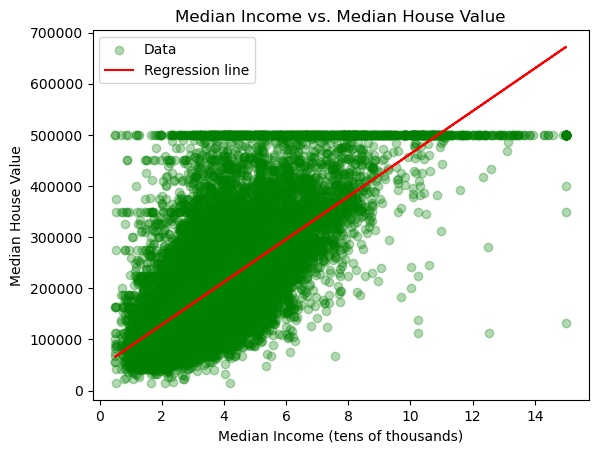

In [65]:
import matplotlib.pyplot as plt
import numpy as np


plt.scatter(df["median_income"], df["median_house_value"], alpha = 0.3, label="Data", color = "green")


plt.plot(df["median_income"], model.predict(sm.add_constant(df["median_income"])), 
         color="red", label="Regression line")

plt.xlabel("Median Income (tens of thousands)")
plt.ylabel("Median House Value")
plt.title("Median Income vs. Median House Value")
plt.legend()

plt.show()


&#9989; **Question 3.3 (2 points):** From your plot, you will notice that the dataset includes a lot of entires with a median housing value of \$500,000. Let us investigate if this affects our regression analysis or not. 

**Do this:** Now mask the housing dataset to exclude all data points with a median house value of at least $500,000. 

In [73]:
df_masked = df[df["median_house_value"]<500000]
df_masked.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19648 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           19648 non-null  float64
 1   latitude            19648 non-null  float64
 2   housing_median_age  19648 non-null  int64  
 3   avg_rooms           19648 non-null  float64
 4   avg_bedrooms        19448 non-null  float64
 5   population          19648 non-null  int64  
 6   households          19648 non-null  int64  
 7   median_income       19648 non-null  float64
 8   median_house_value  19648 non-null  int64  
 9   ocean_proximity     19648 non-null  object 
dtypes: float64(5), int64(4), object(1)
memory usage: 1.6+ MB


&#9989; **Question 3.4 (4 points):** Now make a simple linear regression model that predicts "median_house_value" using "median_income" as the independent variable, on this new data subset. Be sure to use the `add_constant()` method to include a constant term in your model.

In [77]:
x_masked = df_masked["median_income"]
y_masked = df_masked["median_house_value"]

X_masked = sm.add_constant(x_masked)

model_masked = sm.OLS(y_masked, X_masked).fit()

model_masked.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     median_house_value   R-squared:                       0.418
Model:                            OLS   Adj. R-squared:                  0.418
Method:                 Least Squares   F-statistic:                 1.412e+04
Date:                Wed, 05 Nov 2025   Prob (F-statistic):               0.00
Time:                        19:48:45   Log-Likelihood:            -2.4819e+05
No. Observations:               19648   AIC:                         4.964e+05
Df Residuals:                   19646   BIC:                         4.964e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          4.505e+04   1345.113     33.489      0.000    4.24e+04    4.77e+04
median_income  3.999e+04    336.461    118.846      0.000    3.93e+04    4.06e+04
==============================================================================
Omnibus:                     3139.280   Durbin-Watson:                   0.618
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5890.885
Skew:                           1.005   Prob(JB):                         0.00
Kurtosis:                       4.776   Cond. No.                         10.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

&#9989; **Question 3.5 (4 points):** Make a scatter plot of your independent and dependent data, and also plot the line predicted by the new regression model above. Include descriptive labels, titles, and legends as appropriate.

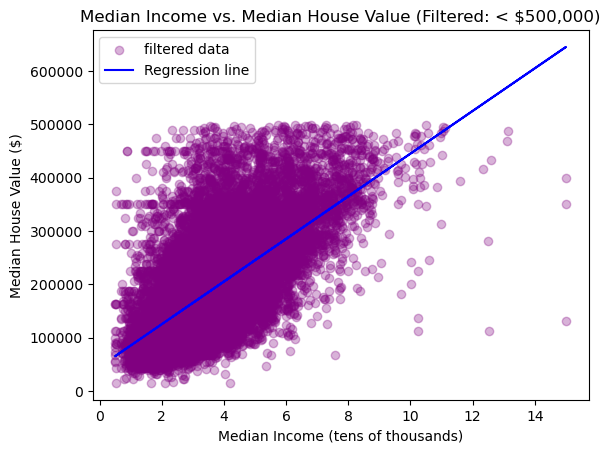

In [83]:
plt.scatter(df_masked["median_income"], df_masked["median_house_value"], alpha=0.3, label = "filtered data", color = "Purple")

plt.plot(df_masked["median_income"], model_masked.predict(sm.add_constant(df_masked["median_income"])), color ="Blue", label = "Regression line")

plt.xlabel("Median Income (tens of thousands)")
plt.ylabel("Median House Value ($)")
plt.title("Median Income vs. Median House Value (Filtered: < $500,000)")
plt.legend()
plt.show()

&#9989; **Question 3.6 (1 point):** Comment on the fit of your last model. What are you using to judge the fit?

<font size=+3>&#9998;</font> Still using the R-squared value, the masked model still shows a strong positive relationship. The R-squared value is slightly less, so the fit is slightly weaker after removing the 500,000 data. 

---
### &#128721; STOP
**Pause to commit your changes to your Git repository!**

Take a moment to save your notebook, commit the changes to your local `git` repository using the commit message "Part 3 complete", and push the changes to GitHub.

---
<a name="part4"></a>
[Back to ToC](#toc)


# Part 4: Multiple Regression (27 points)
In this part, we will explore multivariable regression on the same California Housing dataset from part 3. Reload the dataset that includes median house values of $500,000.

&#9989; **Question 4.1 (5 points)**: Using the `OLS()` method in `statsmodels.api`, make a multiple regression model that predicts "median_house_value" using the other variables, and display the `.summary()` of that process. Remember that you may need to use the `add_constant()` method to make sure `OLS` fits a general line $y = k+ax_1 + bx_2 +... +hx_8$, with $k$ constant, to the data instead of a line through the origin $y = ax_1 + bx_2 +... +hx_8$. 

In [90]:
df = pd.read_csv("housing.csv")

df = df.drop(columns=["ocean_proximity"]).dropna()
x = df.drop(columns=["median_house_value"])
y = df["median_house_value"]

X = sm.add_constant(x)

model = sm.OLS(y,X).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     median_house_value   R-squared:                       0.639
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     4514.
Date:                Wed, 05 Nov 2025   Prob (F-statistic):               0.00
Time:                        20:02:08   Log-Likelihood:            -2.5677e+05
No. Observations:               20433   AIC:                         5.136e+05
Df Residuals:                   20424   BIC:                         5.136e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -3.558e+06   6.35e+04    -56.021      0.000   -3.68e+06   -3.43e+06
longitude          -4.223e+04    725.615    -58.205      0.000   -4.37e+04   -4.08e+04
latitude           -4.213e+04    692.323    -60.854      0.000   -4.35e+04   -4.08e+04
housing_median_age  1139.3771     43.181     26.386      0.000    1054.739    1224.015
avg_rooms          -6625.2745    573.271    -11.557      0.000   -7748.932   -5501.617
avg_bedrooms        4.571e+04   2737.024     16.699      0.000    4.03e+04    5.11e+04
population           -41.2977      1.036    -39.865      0.000     -43.328     -39.267
households           134.5370      3.087     43.583      0.000     128.486     140.588
median_income       4.156e+04    406.403    102.256      0.000    4.08e+04    4.24e+04
==============================================================================
Omnibus:                     4964.002   Durbin-Watson:                   0.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            20949.365
Skew:                           1.141   Prob(JB):                         0.00
Kurtosis:                       7.404   Cond. No.                     2.52e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.52e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

&#9989;  **Question 4.2 (4 points)**: Answer the following two questions: 

1. What is the R-squared value you got? 

2. Based on your R-squared value, what does it tell you about the regression fit, and how the model fits the data?

<font size=+3>&#9998;</font> The R-squared value I got is 0.639, which means that 63.9% of the variation in median house value is explained when you combine multiple features with the multivariable regression. 

&#9989;  **Question 4.3 (2 points)**: 
Based on the output of the OLS summary, which of these features (variables) appears to be "significant" in predicting the "median_house_value"?

<font size=+3>&#9998;</font> All features have a p-value less than 0.05, so they are all significant. 

&#9989;  **Question 4.4 (4 points)**: In the output of the OLS summary, you should have seen a note that says something like 

"_The condition number is large, [[number]]. This might indicate that there are strong multicollinearity or other numerical problems._" 

Multicollinearity is a statistical phenomenon where some of the features in a model can be linearly predicted using some of the other features in the model. In other words, the features in the model are somewhat redundant. Hence, even if each feature may be deemed significant, it may still be possible to form a "reduced" model using a smaller number of features. 

---
**Do This:** Design a second linear model that uses only **three** of the eight variables to predict the "median_house_value", and fits the data comparably well as the first linear model you designed in Question 4.2. You can choose this subset either by trial and error or by any other method you'd like.

In [94]:
x_reduced = df[["median_income", "latitude", "housing_median_age"]]
y = df["median_house_value"]

X_reduced = sm.add_constant(x_reduced)

model_reduced = sm.OLS(y, X_reduced).fit()

model_reduced.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     median_house_value   R-squared:                       0.518
Model:                            OLS   Adj. R-squared:                  0.518
Method:                 Least Squares   F-statistic:                     7313.
Date:                Wed, 05 Nov 2025   Prob (F-statistic):               0.00
Time:                        20:13:59   Log-Likelihood:            -2.5972e+05
No. Observations:               20433   AIC:                         5.194e+05
Df Residuals:                   20429   BIC:                         5.195e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               1.662e+05   9661.822     17.202      0.000    1.47e+05    1.85e+05
median_income       4.277e+04    298.289    143.379      0.000    4.22e+04    4.34e+04
latitude           -4910.4280    263.347    -18.646      0.000   -5426.609   -4394.247
housing_median_age  1748.6414     44.853     38.986      0.000    1660.726    1836.557
==============================================================================
Omnibus:                     4092.795   Durbin-Watson:                   0.795
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9686.471
Skew:                           1.127   Prob(JB):                         0.00
Kurtosis:                       5.509   Cond. No.                         803.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

&#9989;  **Question 4.5 (2 points)**: How did your reduced linear model fit the data compared to the full linear model you created in Question 4.1? Give some quantitative justification for this answer.

<font size=+3>&#9998;</font> The reduced model I made fits less well than the model with all of the variables. The reduced model has a R-squared value of 0.518 which is less than the full model with an R-squared value of 0.639. 


&#9989;  **Question 4.6 (5 points)**: Now that you have your reduced model, make a heat map showing the correlations between the different variables (similar to what we did on Day 14). Be sure to include a legend!

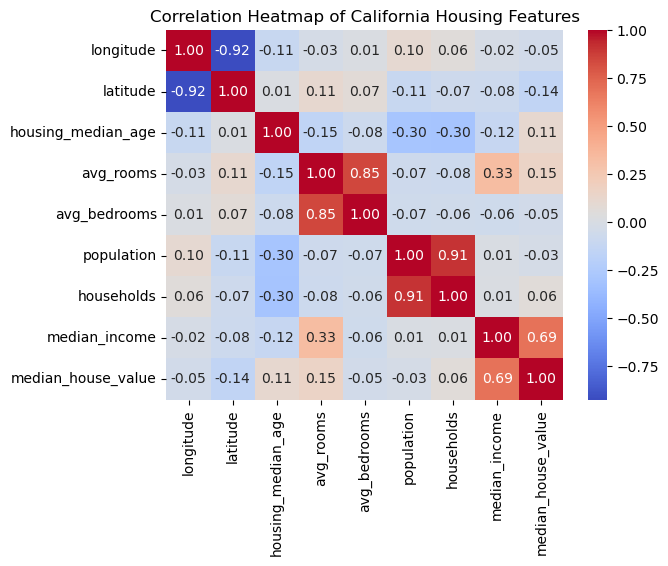

In [97]:
import seaborn as sns
corr = df.corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of California Housing Features")
plt.show()


&#9989;  **Question 4.7 (1 point)**: You should find that there isn’t much overlap between the high-correlation variables in the heat map and the variables you used in your (reduced)  model, the opposite of what we found on Day 14. Explain why this is the case.

<font size=+3>&#9998;</font> This is because the variables themselves are not highly correlated with each other, they are individually correlated with variation in house value. 

&#9989;  **Question 4.8 (3 points)**: Create three `.graphics.plot_regress_exog` figures, each one using one of the three features in your reduced model as the independent variable, to examine the fit to the data. Pay attention to the top two plots in each instance: the fitted values figure and the residual plot. 

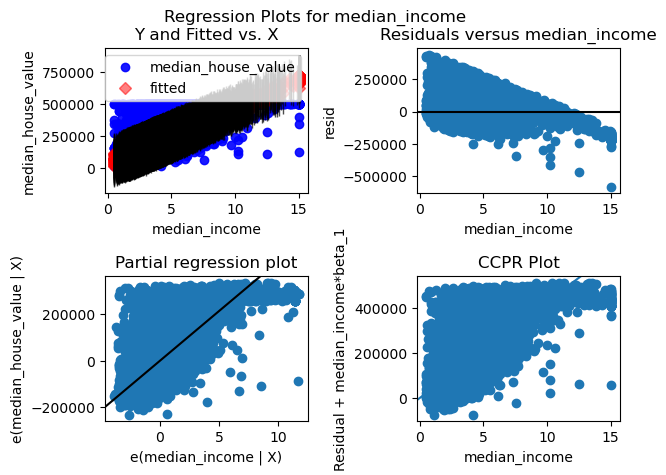

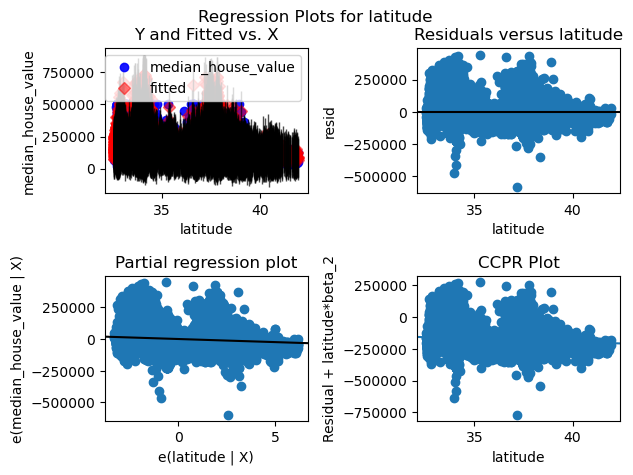

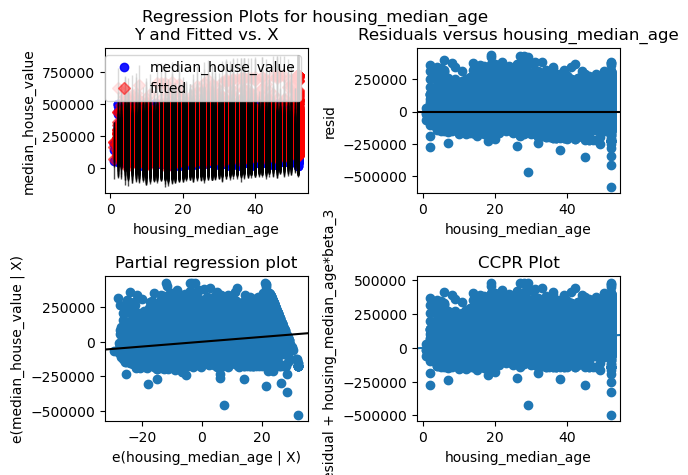

In [104]:
fig1 = sm.graphics.plot_regress_exog(model_reduced, "median_income")
fig2 = sm.graphics.plot_regress_exog(model_reduced, "latitude")
fig3 = sm.graphics.plot_regress_exog(model_reduced, "housing_median_age")

plt.show()


&#9989;  **Question 4.9 (1 point)**: Now use some online resource to help you make sense of these residual plots. Describe the trends that you see. Be as detailed as possible. Is there heteroscedasticity? Is there constant variance? Are there any signs of non-linearity? These are a few questions you might ask yourself or try to answer to make sense of the residual plots.

<font size=+3>&#9998;</font> The variance increases with higher median income, which does indicate heteroscedasticity. The spread is not uniform for all of the values, especially within the median_income. There is some slight non-linearity, so a linear model might not capture all of the relationships in the data. 

---
### &#128721; STOP
**Pause to commit your changes to your Git repository!**

Take a moment to save your notebook, commit the changes to your local `git` repository using the commit message "Part 4 complete", and push the changes to GitHub.

---
<a name="part5"></a>
[Back to ToC](#toc)

## Part 5. Logistic Regression (22 points)

In this part of the homework, you will work with data from an unknown source. Our goal is to use logistic regression to identify who is more likely to buy merchandise from ads on social networks.

&#9989;  **Question 5.1 (3 points)**: **Do This:**

1. Download the dataset and write the command you used in the next cell

`https://raw.githubusercontent.com/msu-cmse-courses/cmse202-F22-data/main/HW/Homework_4/ads.csv`
    
2. Load the data in this file into a `Pandas` dataframe
3. Display the first **five** rows of the dataframe. 

In [112]:
#curl -O https://raw.githubusercontent.com/msu-cmse-courses/cmse202-F22-data/main/HW/Homework_4/ads.csv


In [130]:
# Put your code for reading in the dataset here
df = pd.read_csv("https://raw.githubusercontent.com/msu-cmse-courses/cmse202-F22-data/main/HW/Homework_4/ads.csv")
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


As you can see the dataset has only few columns. The first columns is not useful since it is a unique identifier. The second column could be useful, however, we need numbers instead of strings. Hence we are left only with the last three columns. `Age` and `EstimatedSalary` will be our features while `Purchased` will be our labels 

&#9989;  **Question 5.2 (3 points)**: 

1. **Do This:** Drop the first and second columns of the dataset    
2. **Do This:** Divided the rest of the dataset into a train and a test dataset using `train_test_split` function of `scikit-learn`. The test dataset should be 25% of the original data


In [132]:
from sklearn.model_selection import train_test_split

df = df.drop(df.columns[[0, 1]], axis=1)


x = df[["Age", "EstimatedSalary"]]
y = df["Purchased"]


X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)


print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)


Training set size: (300, 2)
Test set size: (100, 2)


&#9989;  **Question 5.3 (4 points)**: 

1. **Do This:** Use the `Logit` class to perform Logistic regression on your training dataset (don't forget to add the constant).
2. **Do This:** Print the results of your model


In [134]:
import statsmodels.api as sm

X_train_const = sm.add_constant(X_train)

logit_model = sm.Logit(y_train, X_train_const).fit()

print(logit_model.summary())


Optimization terminated successfully.
         Current function value: 0.371982
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:              Purchased   No. Observations:                  300
Model:                          Logit   Df Residuals:                      297
Method:                           MLE   Df Model:                            2
Date:                Wed, 05 Nov 2025   Pseudo R-squ.:                  0.4355
Time:                        20:40:42   Log-Likelihood:                -111.59
converged:                       True   LL-Null:                       -197.69
Covariance Type:            nonrobust   LLR p-value:                 4.080e-38
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             -12.0100      1.445     -8.313      0.000     -14.842      -9.178
Age           

&#9989;  **Question 5.4 (2 points)**: Do you think this is a good fit? Explain your answer


<font size=+3>&#9998;</font> This seems to be a good fit since age and estimated salary have small p-values. And the pseudo R-squared value is 0.4355 which is good. 

&#9989;  **Question 5.5 (4 points)**: Use the above model to make predictions on the test dataset. Remember that the `Logit` model returns continuous values from 0 to 1 while you need two discrete values. Then use the function `accuracy_score` from `scikit-learn` to see how good your model is.

In [137]:
from sklearn.metrics import accuracy_score

x_test_const = sm.add_constant(X_test)

y_pred_prob = logit_model.predict(x_test_const)

y_pred = [1 if p > 0.5 else 0 for p in y_pred_prob]

accuracy = accuracy_score(y_test, y_pred)

print("Model accuracy on test data:", round(accuracy, 3))


Model accuracy on test data: 0.89


&#9989;  **Question 5.6 (1 point)**: Does the accuracy score change your opinion of the goodness of your model?


<font size=+3>&#9998;</font> 89% accuracy is good so I still think the model is good. 

&#9989;  **Question 5.7 (5 points)**: Does your model improve if you re-introduce the `Gender` column? Since the column is made of strings, replace `Male` with 0 and `Female` with 1. Is `Gender` an informative feature?
Explain your answers.

In [140]:
df = pd.read_csv("https://raw.githubusercontent.com/msu-cmse-courses/cmse202-F22-data/main/HW/Homework_4/ads.csv")

df["Gender"] = df["Gender"].map({"Male": 0, "Female": 1})
x = df[["Age", "EstimatedSalary", "Gender"]]
y = df["Purchased"]

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)
X_train_const = sm.add_constant(X_train)
logit_gender = sm.Logit(y_train, X_train_const).fit()

print(logit_gender.summary())
X_test_const = sm.add_constant(X_test)
y_pred_prob = logit_gender.predict(X_test_const)
y_pred = [1 if p > 0.5 else 0 for p in y_pred_prob]
accuracy_gender = accuracy_score(y_test, y_pred)
print("Model accuracy with Gender included:", round(accuracy_gender, 3))


Optimization terminated successfully.
         Current function value: 0.371191
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:              Purchased   No. Observations:                  300
Model:                          Logit   Df Residuals:                      296
Method:                           MLE   Df Model:                            3
Date:                Wed, 05 Nov 2025   Pseudo R-squ.:                  0.4367
Time:                        20:47:47   Log-Likelihood:                -111.36
converged:                       True   LL-Null:                       -197.69
Covariance Type:            nonrobust   LLR p-value:                 3.393e-37
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             -12.0315      1.452     -8.285      0.000     -14.878      -9.185
Age           

<font size=+3>&#9998;</font> Gender is 

---
### &#128721; STOP
**Pause to commit your changes to your Git repository!**

Take a moment to save your notebook, commit the changes to your local `git` repository using the commit message "Part 5 complete", and push the changes to GitHub.

---
[Back to ToC](#toc)

<a name="part5"></a>
## Part 6. Setting a project timeline. (5 points)

You should know which project you will be working on with your group by now. You and your group will be presenting this project during the last week of class (November 24th-December 2nd).  Come up with a project timeline with specific goals/checkpoints to meet as this deadline approaches.  The ability to set project timelines is a very useful skill to have professionally. You can create this timeline yourself, as a group, or you may ask generative AI to try and make a timeline for you. Try to, in the very least, create weekly checkpoints (~3).

<font size=+3>&#9998;</font> Put your timeline here:

---
<a name="conclusion"></a>
[Back to ToC](#toc)

## Part 7: Assignment wrap-up (4 points)


**7.1:** (1 point) Have you put **your name** and **GitHub username** at the top of your notebook?

**7.2:** (3 points) Now that you've finished your new "development" on your 202 turn-in repo, you can merge your work back into your `main` branch.

**&#9989; Do the following**:

1. Switch back to your `main` branch. 
2. Merge your `hw03_branch` with your `main` branch. 
3. Finally, push the changes to GitHub.

**NOTE:** The grader will be able to see your commit messages and whether you pushed the repo at this stage, if everything has gone as planned. Double-check that things look correct on **GitHub** before you submit this notebook to **D2L**.

---
## Congratulations, you're done!

Submit this assignment by uploading it to the course D2L web page.  Go to the "Homework Assignments" folder, find the dropbox link for Homework 3, and upload it there.

&#169; Copyright 2025,  Department of Computational Mathematics, Science and Engineering at Michigan State University